<a href="https://colab.research.google.com/github/Jair2472/Proyecto_Prediccion_MargenBruto/blob/main/EDA/Visualizacion_Grafica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load your data into a pandas DataFrame
import pandas as pd

# Replace '/path/to/your/data.csv' with the actual path to your data file
try:
    df = pd.read_csv('/content/dataset_corregido.csv')
except FileNotFoundError:
    print("Error: The file was not found. Please replace '/path/to/your/data.csv' with the correct path to your data file.")
    # You might want to exit or handle the error differently depending on your needs
    exit() # Exit the cell execution
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")
    exit() # Exit the cell execution

# Display the first few rows of the DataFrame to confirm it's loaded correctly
display(df.head())

,FiscalYear,Period,DayOfPeriod,Date,Depto,NameDept,VentasAcum,CostosAcum,IngresosAcum,MargenFinal%,DiaSemana,FinDeSemana
0,2019,1,1,2018-10-29,123,CARNICERIA,25582.8444,6224.7430,-178.1956,0.200765,0,0
1,2019,1,2,2018-10-30,123,CARNICERIA,52294.8960,12551.4116,-211.5061,0.200765,1,0
2,2019,1,3,2018-10-31,123,CARNICERIA,75989.9811,17472.1710,-445.8216,0.200765,2,0
3,2019,1,4,2018-11-01,123,CARNICERIA,101996.7774,23246.2604,-820.0995,0.200765,3,0
4,2019,1,5,2018-11-02,123,CARNICERIA,130852.2679,29349.9229,-1185.0055,0.200765,4,0


<Figure size 1400x800 with 0 Axes>

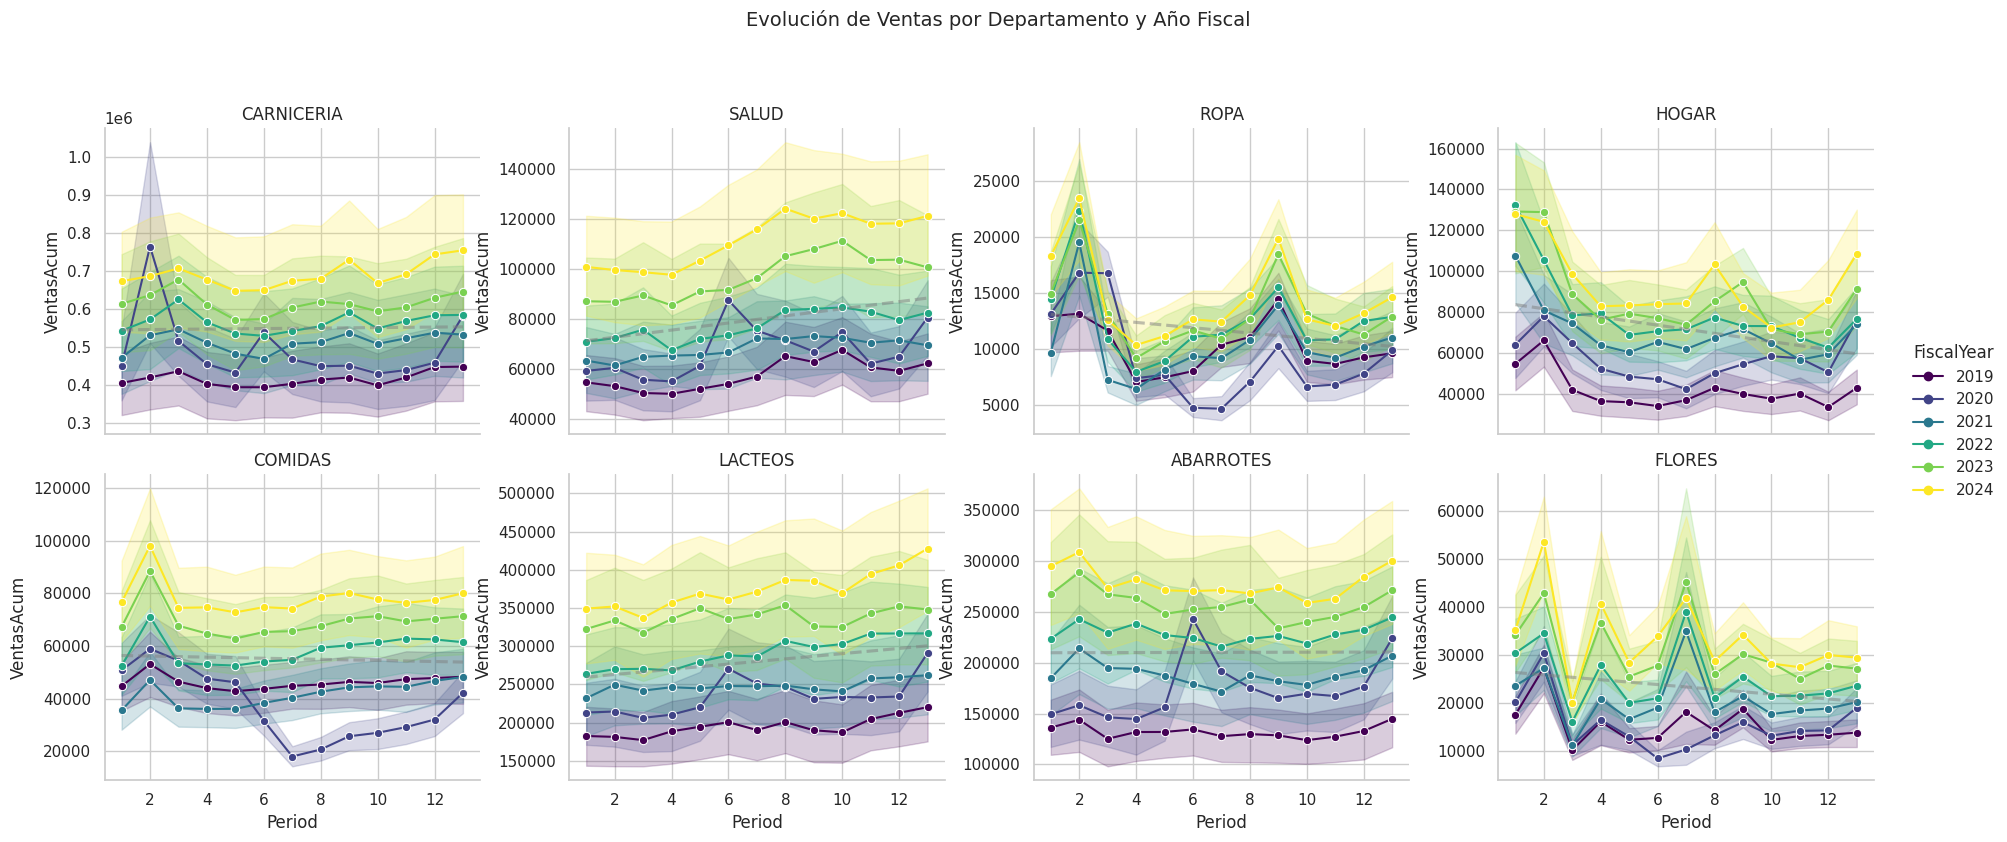

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración inicial
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Gráfico de evolución con más dimensiones
g = sns.relplot(
    data=df,
    x="Period", y="VentasAcum",
    hue="FiscalYear",
    col="NameDept", col_wrap=4,
    kind="line",
    height=4, aspect=1.2,
    facet_kws={'sharey': False},
    marker="o",
    palette="viridis"
)

# Mejorar la presentación
g.set_titles("{col_name}")
g.set_axis_labels("Periodo", "Ventas Acumuladas ($)")
g.fig.suptitle('Evolución de Ventas por Departamento y Año Fiscal', y=1.05, fontsize=14)
g.tight_layout()

# Añadir línea de tendencia
for ax in g.axes.flat:
    sns.regplot(
        data=df[df['NameDept']==ax.get_title()],
        x="Period", y="VentasAcum",
        scatter=False, ci=None,
        color='gray', ax=ax,
        line_kws={'linestyle':'--', 'alpha':0.5}
    )

plt.show()

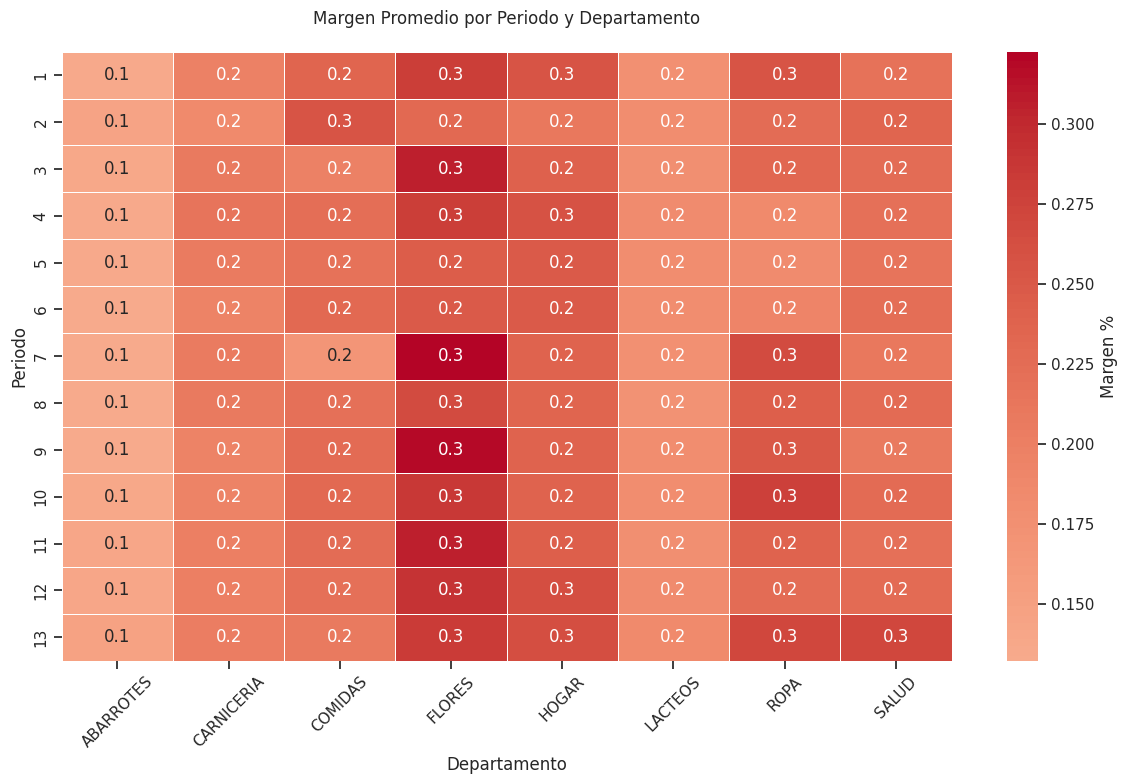

In [ ]:
# Heatmap de margen por periodo y departamento
pivot_table = df.pivot_table(
    index='Period',
    columns='NameDept',
    values='MargenFinal%',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".1f",
    linewidths=.5,
    cbar_kws={'label': 'Margen %'}
)
plt.title('Margen Promedio por Periodo y Departamento', pad=20)
plt.xlabel('Departamento')
plt.ylabel('Periodo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-19-963093319.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FinDeSemana'] = df['FinDeSemana'].fillna(-1).map({0: 'No', 1: 'Sí', -1: 'Unknown'})


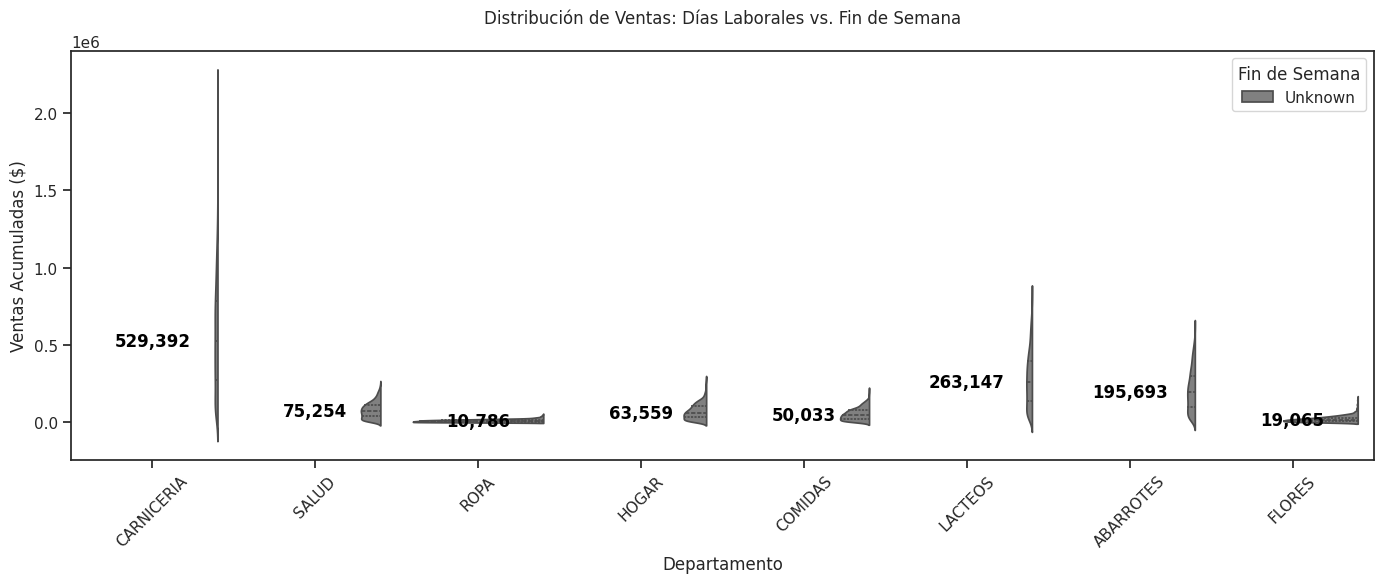

In [ ]:
#Grafica de distribucion de ventas: vias laborales vs fines de semana

"""
# Configurar el estilo
sns.set_style("ticks")

# Handle potential missing values in 'FinDeSemana' and convert to string
df['FinDeSemana'] = df['FinDeSemana'].fillna(-1).map({0: 'No', 1: 'Sí', -1: 'Unknown'})

# Crear el gráfico de violín
plt.figure(figsize=(14, 6))
ax = sns.violinplot(
    data=df,
    x="NameDept",
    y="VentasAcum",
    hue="FinDeSemana",
    split=True,
    inner="quartile",
    palette={"Sí": "tomato", "No": "dodgerblue", "Unknown": "gray"} # Add 'Unknown' to palette
)

# Personalización
plt.title('Distribución de Ventas: Días Laborales vs. Fin de Semana', pad=20)
plt.xlabel('Departamento')
plt.ylabel('Ventas Acumuladas ($)')
plt.xticks(rotation=45)
plt.legend(title='Fin de Semana', loc='upper right')

# Añadir anotaciones estadísticas
medians = df.groupby(['NameDept', 'FinDeSemana'])['VentasAcum'].median()
for i, dept in enumerate(df['NameDept'].unique()):
    # Ensure keys exist for the current department before accessing
    if (dept, 'No') in medians:
        ax.text(i-0.2, medians[(dept, 'No')], f"{medians[(dept, 'No')]:,.0f}",
                ha='center', va='center', color='white', fontweight='bold')
    if (dept, 'Sí') in medians:
         ax.text(i+0.2, medians[(dept, 'Sí')], f"{medians[(dept, 'Sí')]:,.0f}",
                ha='center', va='center', color='white', fontweight='bold')
    if (dept, 'Unknown') in medians:
         ax.text(i, medians[(dept, 'Unknown')], f"{medians[(dept, 'Unknown')]:,.0f}",
                ha='center', va='center', color='black', fontweight='bold')


plt.tight_layout()
plt.show() """

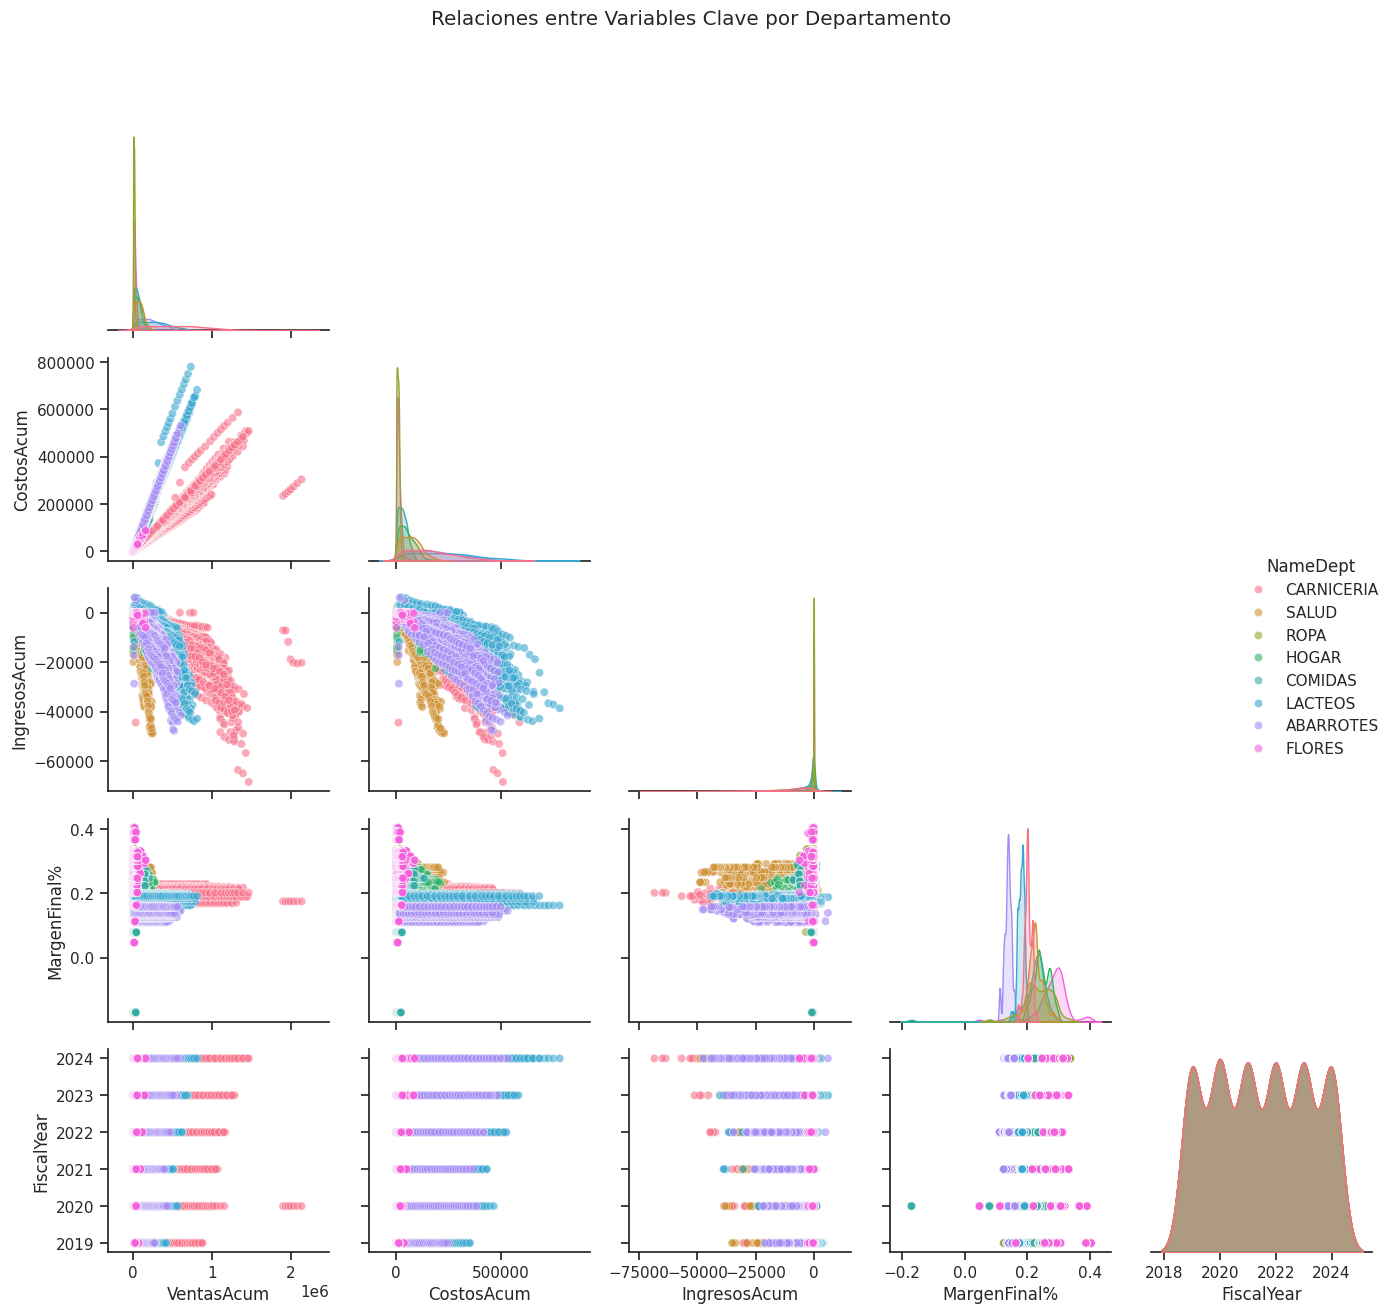

In [ ]:
# Seleccionar variables numéricas
numeric_vars = ['VentasAcum', 'CostosAcum', 'IngresosAcum', 'MargenFinal%']

# Crear pairplot con más dimensiones
g = sns.pairplot(
    df[numeric_vars + ['NameDept', 'FiscalYear']],
    hue="NameDept",
    palette="husl",
    markers="o",
    diag_kind="kde",
    corner=True,
    height=2.5,
    plot_kws={'alpha': 0.6}
)

# Mejorar la presentación
g.fig.suptitle('Relaciones entre Variables Clave por Departamento', y=1.05)
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-2875127022.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


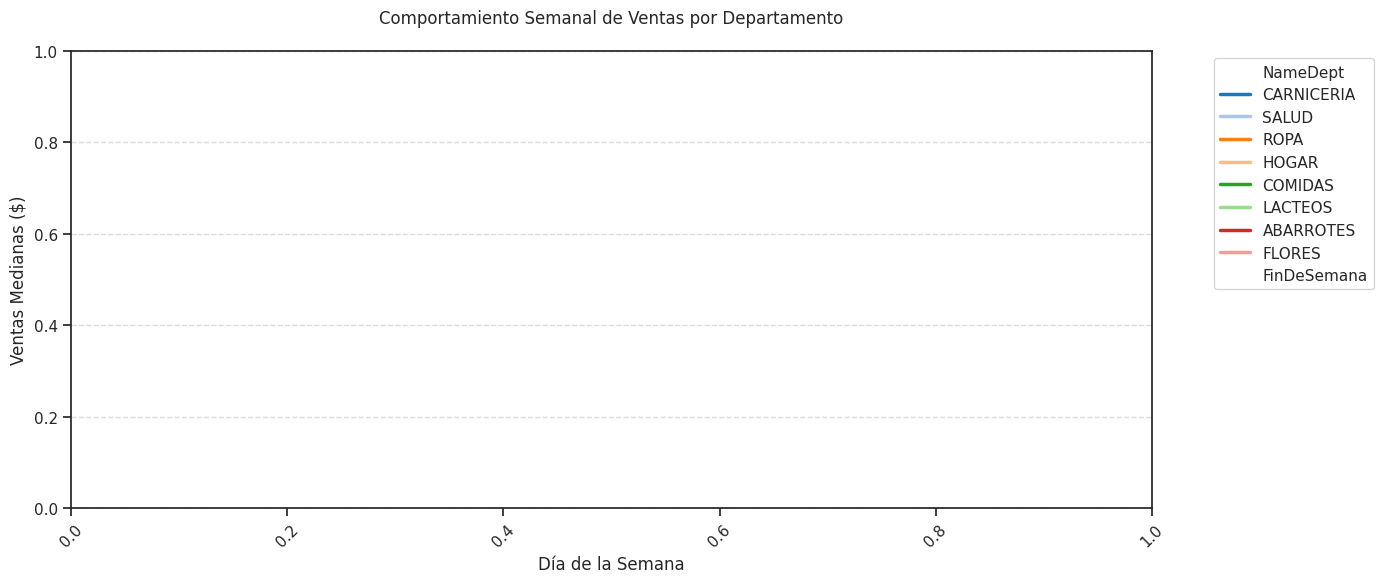

In [ ]:
# Agrupar por día de semana
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df,
    x="DiaSemana", y="VentasAcum",
    hue="NameDept",
    style="FinDeSemana",
    markers=True,
    dashes=False,
    palette="tab20",
    linewidth=2.5,
    estimator="median",
    err_style="bars",
    ci=95
)

# Personalización
plt.title('Comportamiento Semanal de Ventas por Departamento', pad=20)
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Medianas ($)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()